In [3]:


######iniital embeddings - cached 
import json
import os
from openai import OpenAI
import pandas as pd
import numpy as np
from dotenv import load_dotenv
EMBEDDING_MODEL = "text-embedding-ada-002"
from sklearn.metrics.pairwise import cosine_similarity
load_dotenv()
#set up 
embeddings = []  # list to store embedding vectors
df = pd.read_json("./files/courses.json")

client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))

# Function to generate embeddings
def get_embedding(text):
    response = client.embeddings.create(
    input=text,
    model="text-embedding-3-small"
    )
    return response.data[0].embedding

# Generate and save embeddings
def cache_embeddings(df, filename='course_embeddings.json'):
    embeddings_dict = {}
    for idx, row in df.iterrows():
        print(f"Embedding course: {row['title']}")
        embedding = get_embedding(row['description'])
        embeddings_dict[row['title']] = embedding
    
    with open(filename, 'w') as f:
        json.dump(embeddings_dict, f)

# Example usage:
df = pd.read_json("./files/courses.json")
cache_embeddings(df)


Embedding course: ANT101H5
Embedding course: ANT102H5
Embedding course: ANT200H5
Embedding course: ANT201H5
Embedding course: ANT202H5
Embedding course: ANT203H5
Embedding course: ANT204H5
Embedding course: ANT205H5
Embedding course: ANT206H5
Embedding course: ANT207H5
Embedding course: ANT208H5
Embedding course: ANT209H5
Embedding course: ANT210H5
Embedding course: ANT211H5
Embedding course: ANT214H5
Embedding course: ANT215H5
Embedding course: ANT216H5
Embedding course: ANT217H5
Embedding course: ANT218H5
Embedding course: ANT219H5
Embedding course: ANT220H5
Embedding course: ANT221H5
Embedding course: ANT241H5
Embedding course: ANT280H5
Embedding course: ANT281H5
Embedding course: ANT299H5
Embedding course: ANT299Y5
Embedding course: ANT300H5
Embedding course: ANT306H5
Embedding course: ANT310H5
Embedding course: ANT312H5
Embedding course: ANT313H5
Embedding course: ANT314H5
Embedding course: ANT316H5
Embedding course: ANT317H5
Embedding course: ANT318H5
Embedding course: ANT320H5
E

In [1]:
import json
def load_cached_embeddings(filename='course_embeddings.json'):
    with open(filename, 'r') as f:
        return json.load(f)


embeddings_dict = load_cached_embeddings()


FileNotFoundError: [Errno 2] No such file or directory: 'course_embeddings.json'

In [6]:
#semantic desctiprions 
embeddings_dict['MAT157H5']



[0.013488109223544598,
 0.022480180487036705,
 -0.007646625395864248,
 -0.03583374619483948,
 0.009547069668769836,
 -0.029779233038425446,
 0.020618978887796402,
 0.00014593197556678206,
 0.04121553525328636,
 0.09767947345972061,
 0.031124679371714592,
 -0.0009509228984825313,
 -0.03352406248450279,
 0.009092980995774269,
 0.03839009627699852,
 0.03208891674876213,
 0.023029573261737823,
 0.012097813189029694,
 0.028097422793507576,
 0.038748882710933685,
 0.06256330013275146,
 -0.01765899546444416,
 0.030496804043650627,
 0.01819717511534691,
 0.0613972432911396,
 -0.05031972751021385,
 0.02341078221797943,
 0.037313736975193024,
 -0.021605640649795532,
 -0.04549854248762131,
 0.06372935324907303,
 -0.006015270482748747,
 -0.014654163271188736,
 0.004044750705361366,
 0.01098781917244196,
 -0.006687994115054607,
 0.006884205155074596,
 0.04695611074566841,
 0.009188283234834671,
 0.006116178818047047,
 -0.03235800564289093,
 0.012064177542924881,
 -0.02197563834488392,
 -0.007932532

In [7]:

### node2vec embeddings EDGES for prereqs

import json
import re

# Load input data from JSON file
with open("./files/courses.json", 'r') as f:
    courses_json = json.load(f)

def parse_prerequisites(prereq_str):
    if prereq_str.lower() == "none":
        return []

    # Regex pattern for course codes 
    pattern = r'[A-Z]{3}[0-9]{3}[HY][135]'

    # Split by 'and' first
    and_parts = [part.strip() for part in re.split(r'\band\b', prereq_str, flags=re.IGNORECASE)]

    result = []
    for part in and_parts:
        # Extract all course codes from each part (handles OR conditions implicitly)
        codes = re.findall(pattern, part)

        # If multiple codes exist in the part, it's an OR condition
        if len(codes) > 1:
            result.append(codes)  # OR condition
        elif len(codes) == 1:
            result.append(codes[0])  # single prerequisite
        # Non-course code text is automatically discarded as no matches will be found

    return result


def generate_edges(prereq_str, course_title):

    parsed_prereqs = parse_prerequisites(prereq_str)
    edges = []
    for prereq in parsed_prereqs:
        if isinstance(prereq, list):  # OR condition
            for or_prereq in prereq:
                edges.append((or_prereq, course_title))
        else:  # Single prerequisite (AND)
            edges.append((prereq, course_title))
    return edges


def build_prereq_dict(courses):
    prereq_dict = {}

    for course in courses:
       
        code = course['title']
        prereq_str = course["prerequisites"]

        prereqs = generate_edges(prereq_str, code)

        prereq_dict[code] = prereqs

    return prereq_dict


# Use the function
prerequisites = build_prereq_dict(courses_json)
print(prerequisites)




{'ANT101H5': [], 'ANT102H5': [], 'ANT200H5': [('ANT101H5', 'ANT200H5')], 'ANT201H5': [('ANT200H5', 'ANT201H5')], 'ANT202H5': [('ANT101H5', 'ANT202H5'), ('BIO152H5', 'ANT202H5')], 'ANT203H5': [('ANT101H5', 'ANT203H5'), ('BIO153H5', 'ANT203H5')], 'ANT204H5': [('ANT102H5', 'ANT204H5')], 'ANT205H5': [('ANT101H5', 'ANT205H5'), ('BIO152H5', 'ANT205H5')], 'ANT206H5': [('ANT102H5', 'ANT206H5')], 'ANT207H5': [('ANT102H5', 'ANT207H5')], 'ANT208H5': [], 'ANT209H5': [], 'ANT210H5': [], 'ANT211H5': [], 'ANT214H5': [], 'ANT215H5': [], 'ANT216H5': [], 'ANT217H5': [], 'ANT218H5': [], 'ANT219H5': [], 'ANT220H5': [('ANT101H5', 'ANT220H5'), ('ANT102H5', 'ANT220H5')], 'ANT221H5': [], 'ANT241H5': [], 'ANT280H5': [], 'ANT281H5': [], 'ANT299H5': [], 'ANT299Y5': [], 'ANT300H5': [('ANT200H5', 'ANT300H5'), ('ANT201H5', 'ANT300H5')], 'ANT306H5': [('ANT205H5', 'ANT306H5')], 'ANT310H5': [('ANT200H5', 'ANT310H5'), ('ANT201H5', 'ANT310H5')], 'ANT312H5': [('ANT200H5', 'ANT312H5'), ('ANT201H5', 'ANT312H5')], 'ANT313H5

In [9]:
import networkx as nx
# Build directed graph
G = nx.DiGraph()
for course, prereqs in prerequisites.items():
    for prereq in prereqs:
        G.add_edge(prereq[0],prereq[1])  # edge from prereq → course

# Ensure all courses exist as nodes
G.add_nodes_from(prerequisites.keys())

/var/folders/6m/ypyysmh93030_g6fh3pgw7br0000gn/T/ipykernel_23095/292670182.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap('tab20', len(communities))


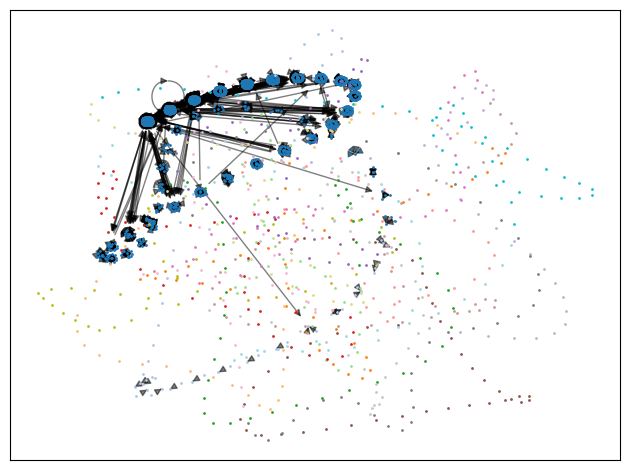

In [72]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import numpy as np

# Identify communities using modularity-based clustering
communities = nx.community.greedy_modularity_communities(G)

# Create a "supergraph" layout to position clusters
supergraph = nx.cycle_graph(len(communities))
superpos = nx.spring_layout(supergraph, scale=50, seed=429)

# Compute positions for individual nodes based on community positions
pos = {}
for center_pos, comm in zip(superpos.values(), communities):
    subgraph = G.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, center=center_pos, seed=1430)
    pos.update(sub_pos)

# Dynamically generate colors for communities
color_map = cm.get_cmap('tab20', len(communities))
colors = [color_map(i) for i in np.linspace(0, 1, len(communities))]

# Draw nodes with dynamic colors
for nodes, clr in zip(communities, color_map(np.linspace(0, 1, len(communities)))):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=[clr], node_size=1)

# Draw edges
nx.draw_networkx_edges(G, pos=pos, alpha=0.5)

plt.tight_layout()
plt.show()

In [73]:
from node2vec import Node2Vec

# Node2Vec hyperparameters
dimensions = 1536
walk_length = 10
num_walks = 100
p, q = 1, 4  

# Generate embeddings
node2vec = Node2Vec(G, dimensions=dimensions, walk_length=walk_length,
                    num_walks=num_walks, workers=2, p=p, q=q, seed=42)

model = node2vec.fit(window=5, min_count=1)

# Save embeddings into dictionary
course_embeddings = {course: model.wv[course] for course in G.nodes()}


Generating walks (CPU: 2): 100%|██████████| 50/50 [00:00<00:00, 250.33it/s]


In [74]:
for key in list(course_embeddings.keys()):
    if key not in embeddings_dict:
        course_embeddings.pop(key, None)


In [26]:
%pip install node2vec

Defaulting to user installation because normal site-packages is not writeable
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.3.2
    Uninstalling joblib-1.3.2:
      Successfully uninstalled joblib-1.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dspy-ai 2.1.9 requires joblib~=1.3.2, but you have joblib 1.4.2 which is incompatible.
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [37]:
import random

# Step 1: Create positive pairs (label=1), ensuring keys exist in both embeddings_dict and course_embeddings
positive_pairs = set()
for edges in prerequisites.values():
    for prereq, course in edges:
        if prereq in embeddings_dict and prereq in course_embeddings \
           and course in embeddings_dict and course in course_embeddings:
            positive_pairs.add((prereq, course))
            

# Step 2: Generate negative pairs (label=-1)
# Use intersection of keys to ensure validity
valid_courses = list(set(prerequisites.keys()) & set(embeddings_dict.keys()) & set(course_embeddings.keys()))
negative_pairs = set()

# Generate negative pairs without overlapping positive pairs
while len(negative_pairs) < len(positive_pairs):
    a, b = random.sample(valid_courses, 2)
    if (a, b) not in positive_pairs and (b, a) not in positive_pairs:
        negative_pairs.add((a, b))

# Step 3: Combine into final training set
course_pairs = []

for pair in positive_pairs:
    course_pairs.append((pair[0], pair[1], 1))

for pair in negative_pairs:
    course_pairs.append((pair[0], pair[1], -1))

# Shuffle the pairs
random.shuffle(course_pairs)

# Check the final output
for pair in course_pairs:
    print(pair)


('HIN313H5', 'RLG304H5', -1)
('AST101H5', 'PSY389H5', -1)
('SOC109H5', 'SOC424H5', 1)
('ECO220Y5', 'ECO460H5', 1)
('STA260H5', 'ECO375H5', 1)
('ECO299Y5', 'UTM450H5', -1)
('RLG211H5', 'MGT491H5', -1)
('PSY290H5', 'PSY391H5', 1)
('ECO206Y5', 'ECO348H5', 1)
('MAT139H5', 'CHM242H5', 1)
('PHL105Y5', 'PHL221H5', 1)
('BIO443H5', 'CCT203H5', -1)
('PSY440H5', 'FRE440H5', -1)
('CCT203H5', 'GGR461H5', -1)
('POL209H5', 'POL440H5', 1)
('STA312H5', 'ENG252Y5', -1)
('WGS375H5', 'ENV399Y5', -1)
('HIS321H5', 'STA304H5', -1)
('HIS290H5', 'ARA312Y5', -1)
('JCP322H5', 'ANT434H5', -1)
('POL403H5', 'BIO324H5', -1)
('POL243H5', 'POL343H5', 1)
('PHL103H5', 'PHL240H5', 1)
('PSY240H5', 'PSY343H5', 1)
('PHL497H5', 'ENG100H5', -1)
('MAT134H5', 'MAT382H5', 1)
('SOC311H5', 'MGT299Y5', -1)
('SOC221H5', 'SOC350H5', 1)
('CHM462H5', 'RLG374H5', -1)
('ANT468H5', 'BIO325H5', -1)
('SOC299H5', 'MGT444H5', -1)
('PHL113H5', 'PHL282H5', 1)
('ECO315H5', 'CSC477H5', -1)
('ENG415H5', 'POL370H5', -1)
('HIS103H5', 'HIS420H5', 1)


In [71]:
from sklearn.decomposition import PCA
import numpy as np

# Assuming embeddings_dict is {course_id: embedding vector}
semantic_embeddings = np.array(list(embeddings_dict.values()))

# # PCA to 64 dimensions
# pca = PCA(n_components=64)
# reduced_openai_embeddings = pca.fit_transform(semantic_embeddings)


In [144]:
# alpha = 0.95
alpha = 1 - 0.0652
node2vec_matrix = np.array(list(course_embeddings.values()))
hybrid_embeddings = alpha * semantic_embeddings + (1 - alpha) * node2vec_matrix

hybrid_embeddings_dict = {
    course: hybrid_embeddings[idx]
    for idx, course in enumerate(embeddings_dict.keys())
}



In [145]:
from sklearn.preprocessing import normalize

hybrid_matrix = np.array(list(hybrid_embeddings_dict.values()))

# L2 normalization
hybrid_matrix_normalized = normalize(hybrid_matrix, norm='l2')
 

In [146]:
from sklearn.metrics.pairwise import cosine_similarity

# Example: Get top 5 similar courses for a given course_id
def get_similar_courses(course_id, hybrid_embeddings, top_k=9):
    course_idx = list(hybrid_embeddings.keys()).index(course_id)
    course_emb = hybrid_matrix_normalized[course_idx].reshape(1, -1)
    
    similarities = cosine_similarity(course_emb, hybrid_matrix_normalized)[0]
    
    # Sort indices by similarity
    sorted_indices = similarities.argsort()[::-1][1:top_k+1]  # Skip itself
    
    similar_courses = [(list(hybrid_embeddings.keys())[i], similarities[i]) for i in sorted_indices]
    
    return similar_courses


In [147]:
similar_courses = get_similar_courses('CSC311H5', hybrid_embeddings_dict)
print(similar_courses)


[('STA314H5', 0.5557899287853723), ('CSC413H5', 0.5422456600744651), ('CSC415H5', 0.520291326899786), ('CSC263H5', 0.4767676710579888), ('BIO429H5', 0.4693373929967211), ('CSC310H5', 0.45426102688059805), ('STA315H5', 0.4444405435514333), ('CSC300H5', 0.4435098317280393), ('CSC479H5', 0.4393482694324233)]


In [143]:
similar_courses = get_similar_courses('CSC311H5', embeddings_dict)
print(similar_courses)

[('STA314H5', 0.5866106871981989), ('CSC413H5', 0.5524915835509518), ('CSC415H5', 0.5291259237550179), ('BIO429H5', 0.4799582069637698), ('STA315H5', 0.47111858324026323), ('CSC479H5', 0.44553941372368283), ('MGT373H5', 0.44546021878834974), ('CSC420H5', 0.44469696009821236), ('STA380H5', 0.4438123699169114)]


In [134]:
similar_courses = get_similar_courses('CSC311H5', course_embeddings)
print(similar_courses)

[('MAT223H5', 0.9796493299896546), ('CSC358H5', 0.9351878331204169), ('CSC347H5', 0.7909732942372216), ('CSC310H5', 0.7628918404479399), ('STA246H5', 0.6568172401830761), ('HIS448H5', 0.6329055908240406), ('ENG206H5', 0.6196149141331102), ('HIS271H5', 0.6182100868216873), ('HIS339H5', 0.6168575185788336)]


In [31]:
if set(course_embeddings.keys()) == set(embeddings_dict.keys()):
    print("✅ Dictionaries have the same keys.")
else:
    missing_in_embeddings_dict = set(course_embeddings.keys()) - set(embeddings_dict.keys())
    missing_in_course_embeddings = set(embeddings_dict.keys()) - set(course_embeddings.keys())

    print("❌ Dictionaries have different keys.")
    if missing_in_embeddings_dict:
        print(f"Keys in course_embeddings but missing in embeddings_dict: {missing_in_embeddings_dict}")
    if missing_in_course_embeddings:
        print(f"Keys in embeddings_dict but missing in course_embeddings: {missing_in_course_embeddings}")


✅ Dictionaries have the same keys.


In [32]:
embeddings_dict['STA215H5']

KeyError: 'STA215H5'

In [23]:
course_embeddings['STA215H5']

KeyError: 'STA215H5'

In [92]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
node2vec_matrix = np.array(list(course_embeddings.values()))


# ---- Step 1: Prepare your embeddings ----
course_ids = list(embeddings_dict.keys())

# Convert your embeddings to tensors
semantic_tensor = torch.tensor(semantic_embeddings, dtype=torch.float32)
node_tensor = torch.tensor(node2vec_matrix, dtype=torch.float32)

# Mapping course IDs to indices (for easy lookup)
course_to_idx = {course: idx for idx, course in enumerate(course_ids)}

# ---- Step 2: Training Data ----
# Your existing pairs (example)
course_pairs 

# Convert course IDs to tensor indices
training_data = [
    (course_to_idx[c1], course_to_idx[c2], label) for c1, c2, label in course_pairs
]

# ---- Step 3: Define the Model ----
class HybridEmbeddingModel(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.alpha = nn.Parameter(torch.tensor(0.5))

    def forward(self, semantic_emb, node_emb):
        alpha = torch.sigmoid(self.alpha)
        hybrid_emb = alpha * semantic_emb + (1 - alpha) * node_emb
        return hybrid_emb, alpha.item()

# Instantiate the model
model = HybridEmbeddingModel(dim=semantic_tensor.shape[1])
criterion = nn.CosineEmbeddingLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# ---- Step 4: Training Loop ----
num_epochs = 20

for epoch in range(num_epochs):
    total_loss = 0.0

    for idx1, idx2, label in training_data:
        optimizer.zero_grad()

        emb1, alpha = model(semantic_tensor[idx1], node_tensor[idx1])
        emb2, _ = model(semantic_tensor[idx2], node_tensor[idx2])

        target = torch.tensor([label], dtype=torch.float32)
        loss = criterion(emb1.unsqueeze(0), emb2.unsqueeze(0), target)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(training_data)
    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}, Alpha: {alpha:.4f}")




Epoch 1, Loss: 3201.7853, Alpha: 0.0652
Epoch 2, Loss: 3168.5113, Alpha: 0.0652
Epoch 3, Loss: 3168.5118, Alpha: 0.0652
Epoch 4, Loss: 3168.5118, Alpha: 0.0652
Epoch 5, Loss: 3168.5118, Alpha: 0.0652
Epoch 6, Loss: 3168.5118, Alpha: 0.0652
Epoch 7, Loss: 3168.5118, Alpha: 0.0652
Epoch 8, Loss: 3168.5118, Alpha: 0.0652
Epoch 9, Loss: 3168.5118, Alpha: 0.0652
Epoch 10, Loss: 3168.5118, Alpha: 0.0652
Epoch 11, Loss: 3168.5118, Alpha: 0.0652
Epoch 12, Loss: 3168.5118, Alpha: 0.0652
Epoch 13, Loss: 3168.5118, Alpha: 0.0652
Epoch 14, Loss: 3168.5118, Alpha: 0.0652
Epoch 15, Loss: 3168.5118, Alpha: 0.0652
Epoch 16, Loss: 3168.5118, Alpha: 0.0652
Epoch 17, Loss: 3168.5118, Alpha: 0.0652
Epoch 18, Loss: 3168.5118, Alpha: 0.0652
Epoch 19, Loss: 3168.5118, Alpha: 0.0652
Epoch 20, Loss: 3168.5118, Alpha: 0.0652


/var/folders/6m/ypyysmh93030_g6fh3pgw7br0000gn/T/ipykernel_42903/2935997112.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab20', len(large_communities))


KeyError: 'ARA300Y5'

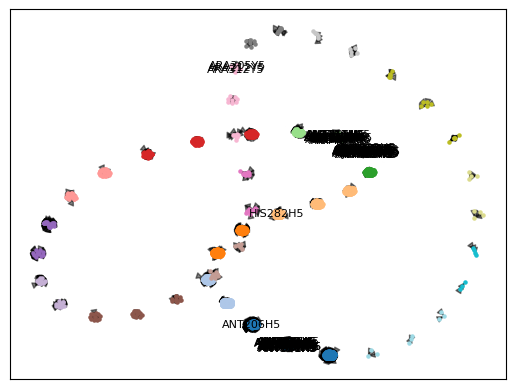

In [34]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import networkx as nx

# Detect communities using networkx
communities = list(nx.community.greedy_modularity_communities(G))

# Filter out small communities (e.g., size less than 3)
large_communities = [comm for comm in communities if len(comm) >= 3]

# Create a supergraph for positioning large communities
supergraph = nx.cycle_graph(len(large_communities))
superpos = nx.spring_layout(supergraph, scale=50, seed=429)

# Compute positions for individual nodes based on community positions
pos = {}
for center_pos, comm in zip(superpos.values(), large_communities):
    subgraph = G.subgraph(comm)
    sub_pos = nx.spring_layout(subgraph, center=center_pos, seed=1430)
    pos.update(sub_pos)

# Dynamically generate colors
colors = cm.get_cmap('tab20', len(large_communities))

# Draw nodes with dynamic colors
for idx, nodes in enumerate(large_communities):
    nx.draw_networkx_nodes(G, pos=pos, nodelist=nodes, node_color=[colors(idx)], node_size=5)

# Draw edges (only those within large communities)
for comm in large_communities:
    subgraph = G.subgraph(comm)
    nx.draw_networkx_edges(subgraph, pos=pos, alpha=0.5)

# Optionally, draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.tight_layout()
plt.show()

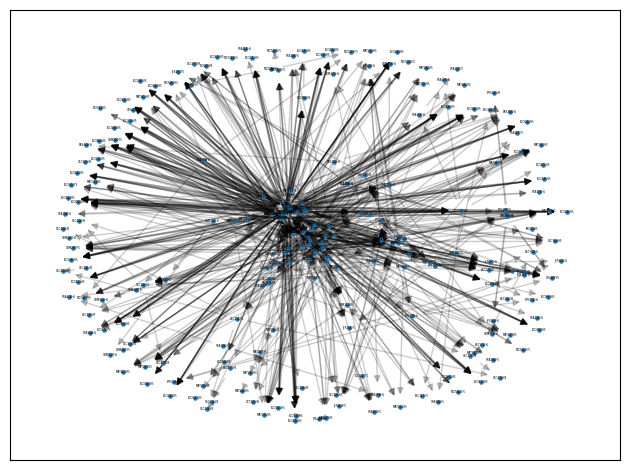

In [76]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import networkx as nx

# Detect communities using networkx
communities = list(nx.community.greedy_modularity_communities(G))

# Select the largest community to zoom into
largest_community = max(communities, key=len)

# Generate positions for nodes in the largest community
pos = nx.spring_layout(G.subgraph(largest_community), seed=1430)

# Draw nodes of the largest community
nx.draw_networkx_nodes(G, pos, nodelist=largest_community, node_color="tab:blue", node_size=5)

# Draw edges within the largest community
nx.draw_networkx_edges(G.subgraph(largest_community), pos, alpha=0.2)

# Draw labels
nx.draw_networkx_labels(G.subgraph(largest_community), pos, font_size=2)

plt.tight_layout()
plt.show()

In [77]:
print("Nodes in the largest community:")
print(sorted(largest_community))


Nodes in the largest community:
['AST221H5', 'AST222H5', 'AST320H5', 'AST325H5', 'BIO200H5', 'BIO314H5', 'BIO333H5', 'CCT325H5', 'CHM110H5', 'CHM120H5', 'CHM140Y5', 'CHM211H5', 'CHM231H5', 'CHM242H5', 'CHM243H5', 'CHM299Y5', 'CHM323H5', 'CHM331H5', 'CHM333H5', 'CHM341H5', 'CHM345H5', 'CHM347H5', 'CHM372H5', 'CHM373H5', 'CHM394H5', 'CHM395H5', 'CHM396H5', 'CHM397H5', 'CHM399Y5', 'CHM436H5', 'CHM442H5', 'CHM489Y5', 'CPS400Y5', 'CPS489Y5', 'CSC263H5', 'CSC310H5', 'CSC311H5', 'CSC321H5', 'CSC322H5', 'CSC338H5', 'CSC343H5', 'CSC373H5', 'CSC375H5', 'CSC376H5', 'CSC384H5', 'CSC411H5', 'CSC413H5', 'CSC415H5', 'CSC420H5', 'CSC428H5', 'CSC476H5', 'CSC477H5', 'CSC478H5', 'CSC479H5', 'CSC496H5', 'ECE286H1', 'ECO100Y5', 'ECO101H1', 'ECO101H5', 'ECO102H5', 'ECO200Y5', 'ECO202Y5', 'ECO204Y5', 'ECO206Y5', 'ECO208Y5', 'ECO209Y5', 'ECO220Y5', 'ECO227Y1', 'ECO227Y5', 'ECO302H5', 'ECO303H5', 'ECO311H5', 'ECO312H5', 'ECO313H5', 'ECO315H5', 'ECO320H5', 'ECO321H5', 'ECO324H5', 'ECO325H5', 'ECO326H5', 'ECO333

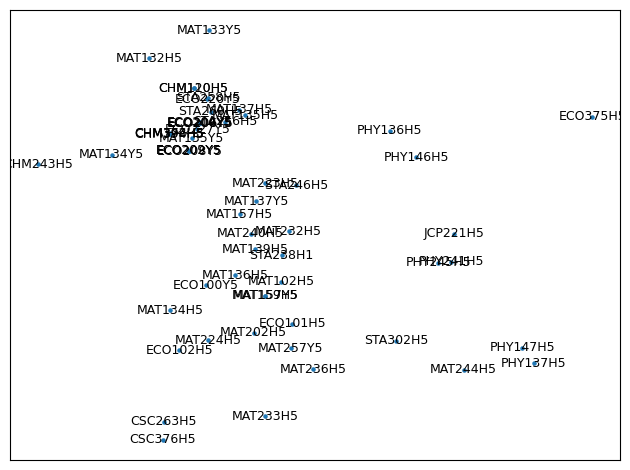

In [84]:
import matplotlib.pyplot as plt
import networkx as nx

# Get the subgraph of the largest community
subgraph = G.subgraph(largest_community)

# Select nodes that have outgoing edges
nodes_with_outgoing_edges = [node for node in subgraph.nodes if subgraph.out_degree(node) > 4]

# Generate positions for nodes
pos = nx.spring_layout(subgraph, seed=1430)

# Draw only nodes with outgoing edges
nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes_with_outgoing_edges, node_color="tab:blue", node_size=5)

# Draw edges originating from these nodes


# Draw labels for nodes with outgoing edges
nx.draw_networkx_labels(subgraph, pos, labels={node: node for node in nodes_with_outgoing_edges}, font_size=9)

plt.tight_layout()
plt.show()


In [ ]:
#semantic desctiprions 
embeddings_dict

#node2vect

course_embeddings
